# Homework 1 | Image Processing

## Q1a | Histograms and Restoration Operations

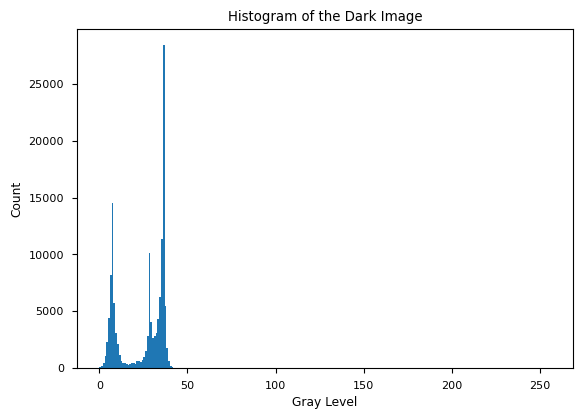

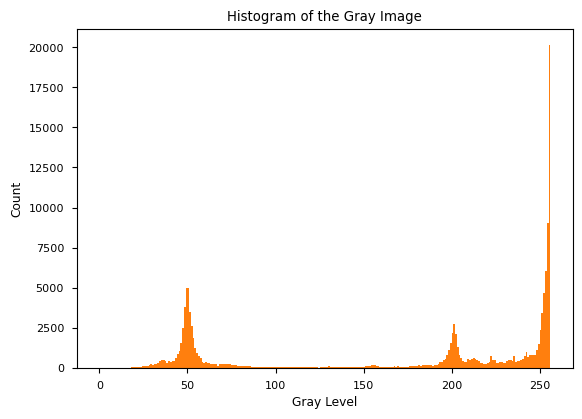

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Read the image/s
Path: str = "/home/sparrow/cv/images"
img_gray: np.ndarray = cv2.imread(Path + "/gray9.jpg")
img_dark: np.ndarray = cv2.imread(Path + "/dark9.jpg")

# Convert images to Grayscale U8
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)

# Getting histogram of the image
plt.hist(
    img_dark.ravel(),
    256,
    [0, 256],
    color = "#1f77b4",
    label = "Dark Image",
);
plt.title("Histogram of the Dark Image");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

plt.hist(
    img_gray.ravel(),
    256,
    [0, 256],
    color = "#ff7f0e",
    label = "Gray Image",
);
plt.title("Histogram of the Gray Image");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

### Q1a | Restoration Technique - Gamma Correction

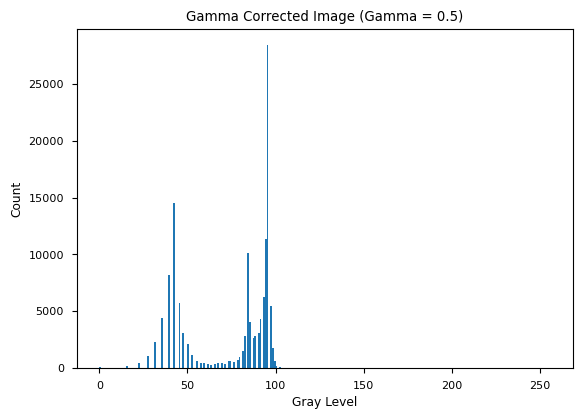

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Read the image/s
Path: str = "/home/sparrow/cv/images"
img_gray: np.ndarray = cv2.imread(Path + "/gray9.jpg")
img_dark: np.ndarray = cv2.imread(Path + "/dark9.jpg")

# Convert images to Grayscale U8
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)


def gamma_correction(image: np.ndarray, gamma: float) -> np.ndarray:
    """
    Apply gamma correction to the input image.

    Parameters:
        image (`np.ndarray`): Input image (numpy array).
        gamma (`float`): Gamma value for correction.

    Returns:
        `np.ndarray`: Corrected image.
    """
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    corrected_image = cv2.LUT(image, table)

    return corrected_image

img_dark_corrected = gamma_correction(img_dark, 0.5)
cv2.imshow("Gamma Corrected Image (gamma = 0.5)", img_dark_corrected)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.hist(
    img_dark_corrected.ravel(),
    256,
    [0, 256],
    label = "Corrected Dark Image",
);
plt.title("Gamma Corrected Image (Gamma = 0.5)");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

### Q1a | Restoration Technique - Logarithm Transform

libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


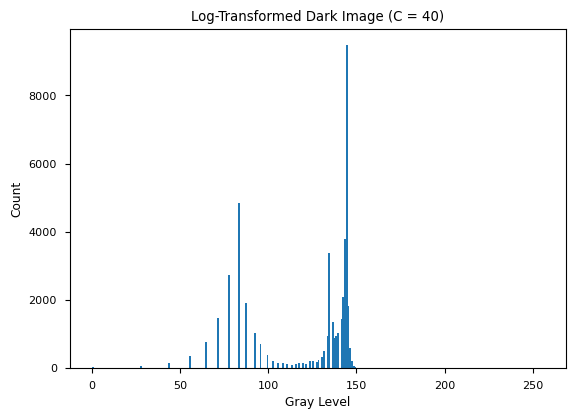

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Read the image/s
Path: str = "/home/sparrow/cv/images"
img_gray: np.ndarray = cv2.imread(Path + "/gray9.jpg")
img_dark: np.ndarray = cv2.imread(Path + "/dark9.jpg")

# Convert images to Grayscale U8
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)


def log_transform(image: np.ndarray, c: float = 1) -> np.ndarray:
    """
    Apply log transformation to an image.

    Parameters:
        image (`numpy.ndarray`): Input image.
        c (`float`): Constant multiplier for adjusting the transformation (default is 1).

    Returns:
        `numpy.ndarray`: Transformed image.
    """
    # s = c * log(1 + r)
    transformed_image = c * np.log(1 + image.astype(np.float32))

    # Normalizing the pixel values to the range [0, 255]
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

    return transformed_image

# Log-Transform the image 
dark_transformed = log_transform(img_dark, 40)

cv2.imshow("Dark Image", img_dark)
cv2.imshow("Log-transformed Dark Image", dark_transformed)
cv2.waitKey(5000)
cv2.destroyAllWindows()

plt.hist(
    dark_transformed.ravel(),
    256,
    [0, 256],
    label = "Transformed Dark Image",
);
plt.title("Log-Transformed Dark Image (C = 40)");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

## Q1b | Histogram Equalization (OpenCV)

libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


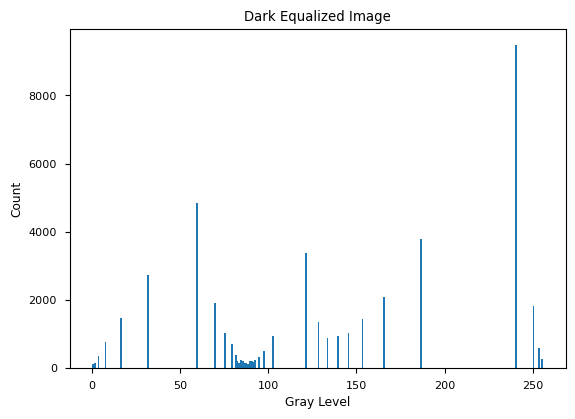

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Read the image/s
Path: str = "/home/sparrow/cv/images"
img_gray: np.ndarray = cv2.imread(Path + "/gray9.jpg")
img_dark: np.ndarray = cv2.imread(Path + "/dark9.jpg")

# Convert images to Grayscale U8
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)

# Equalize histogram
img_dark_eq = cv2.equalizeHist(img_dark)

# Show equalized image
cv2.imshow("Dark Equalized Image", img_dark_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram
plt.hist(
    img_dark_eq.ravel(),
    256,
    [0, 256],
    label = "Dark Image",
);
plt.title("Dark Equalized Image");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

## Q1b | Histogram Equalization (from Scratch)

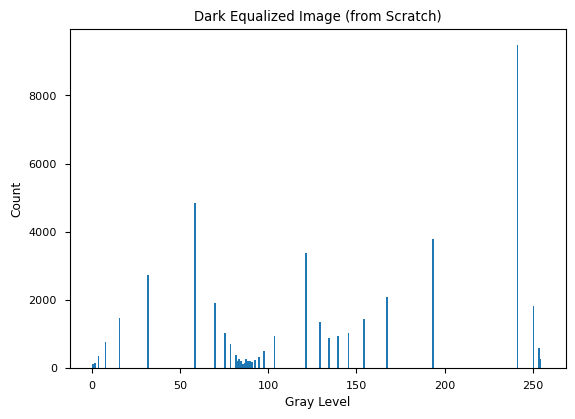

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Read the image/s
Path: str = "/home/sparrow/cv/images"
img_gray: np.ndarray = cv2.imread(Path + "/gray9.jpg")
img_dark: np.ndarray = cv2.imread(Path + "/dark9.jpg")

# Convert images to Grayscale U8
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_RGB2GRAY)

def histogram_equalization(image: np.ndarray) -> np.ndarray:
    """
    Perform histogram equalization on the input grayscale image.

    Parameters:
        image (`numpy.ndarray`): Input grayscale image (2D array).

    Returns:
        `numpy.ndarray`: Equalized image.
    """
    # Calculate histogram
    hist, bins = np.histogram(
        image.flatten(),
        bins = 256,
        range = [0, 255]
    )

    # Calculate "Cumulative Distribution Function (CDF)"
    CDF = hist.cumsum()

    # Normalize the CDF to the range [0, 255]
    CDF_norm = ((CDF - CDF.min()) * 255) / (CDF.max() - CDF.min())

    # Interpolate the CDF values for each pixel intensity
    equalized_image = np.interp(
        image.ravel(),
        bins[:-1],
        CDF_norm
    )
    equalized_image = equalized_image.reshape(image.shape)

    return equalized_image.astype(np.uint8)

# Equalize histogram
img_dark_eq = histogram_equalization(img_dark)

# Show equalized image
cv2.imshow("Dark Equalized Image", img_dark_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram
plt.hist(
    img_dark_eq.ravel(),
    256,
    [0, 256],
    label = "Dark Image",
);
plt.title("Dark Equalized Image (from Scratch)");
plt.xlabel("Gray Level");
plt.ylabel("Count");
plt.show();

## Q1c | Shadowy Image Restoration

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Reading the image/s
Path: str = "/home/sparrow/cv/images"
img_shadow: np.ndarray = cv2.imread(Path + "/shadow9.jpg")

# Converting images to Grayscale U8
img_shadow = cv2.cvtColor(img_shadow, cv2.COLOR_RGB2GRAY)

# Get Gaussian-Blurred Image
img_shadow_gauss = cv2.GaussianBlur(
    img_shadow,
    (75, 75),
    sigmaX = 128,
    sigmaY = 128
)

img_shadow_log = np.log(1 + img_shadow_gauss.astype(np.float32))
img_shadow_gauss = 255 * (img_shadow_log / img_shadow_log.max())
img_shadow_log_gauss = np.uint8(img_shadow_gauss)

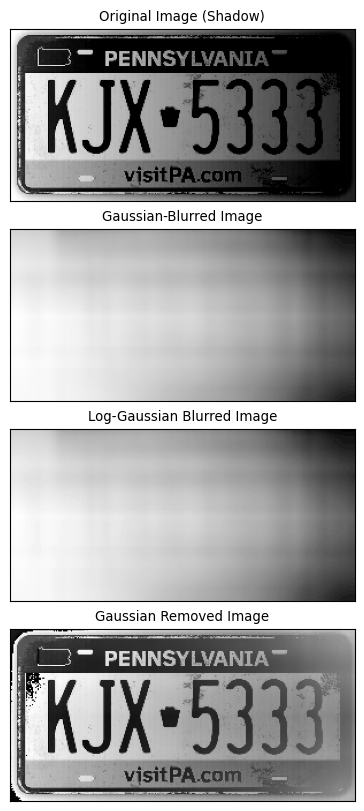

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Reading the image/s
Path: str = "/home/sparrow/cv/images"
img_shadow: np.ndarray = cv2.imread(Path + "/shadow9.jpg")

# Converting images to Grayscale U8
img_shadow = cv2.cvtColor(img_shadow, cv2.COLOR_RGB2GRAY)

# Get Gaussian-Blurred Image
img_shadow_gauss = cv2.GaussianBlur(
    img_shadow,
    (75, 75),
    sigmaX = 128,
    sigmaY = 128
)

cv2.imshow("Image with Gaussian Blur", img_shadow_gauss)

img_shadow_log = np.log(1 + img_shadow_gauss.astype(np.float32))
img_shadow_gauss = 255 * (img_shadow_log / img_shadow_log.max())
img_shadow_log_gauss = np.uint8(img_shadow_gauss)

cv2.imshow("Image with Log-Gaussian Blur", img_shadow_log_gauss)

# Substracting the blurred image from the original image
img_shadow_removed = img_shadow - img_shadow_log_gauss

# Show new image
cv2.imshow("New Image", img_shadow_removed)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q1d | Noise Reduction with Spatial Filtering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")

# Reading the image/s
Path: str = "/home/sparrow/cv/images"
img_nn: np.ndarray = cv2.imread(Path + "/9nn.jpg")
img_sp: np.ndarray = cv2.imread(Path + "/9sp.jpg")

# Converting images to Grayscale U8
img_nn = cv2.cvtColor(img_nn, cv2.COLOR_RGB2GRAY)
img_sp = cv2.cvtColor(img_sp, cv2.COLOR_RGB2GRAY)

# Spatial Filtering
img_nn_box = cv2.blur(img_nn, (3, 3))   # Box Filtering
img_nn_gauss = cv2.GaussianBlur(    # Gauss Filtering
    img_nn,
    (5, 5),
    sigmaX = 1,
    sigmaY = 1
)
img_nn_mdn = cv2.medianBlur(    # Median Filtering
    img_nn,
    5
)

# Show new image
cv2.imshow("New Image", img_nn_mdn)
cv2.waitKey(0)
cv2.destroyAllWindows()

libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast
qt.xkb.compose: failed to create compose table


In [ ]:
# Kernel and Spatial Filtering
K = np.ones((5, 5)) / 25
img_filtered = cv2.filter2D()
# cv2.bilateralFilter() -> Keeps edges intact
# cv2.blur() -> Classic blurring
# cv2.GaussianBlur() -> Gaussian Blurring
# cv2.medianBlur() -> Blurring using median values
# cv2.Laplacian() -> Differentiate (Sharpen)
# original image + laplacian image -> sharper image

# skimage -> Scientific library to create complex filters (butterworth)
#   cutoff_frequency_ratio -> Ratio of diameter of filter to shape of the image
# np.fft.fft2() -> 2D FFT
# np.fft.fftshift() -> Shifts FFT elements to center